<a href="https://colab.research.google.com/github/88FaHaD/ML/blob/main/MulticlassclassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-02-24 15:30:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.207, 74.125.195.207, 172.253.117.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   163MB/s    in 3.0s    

2024-02-24 15:30:22 (163 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 

In [3]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


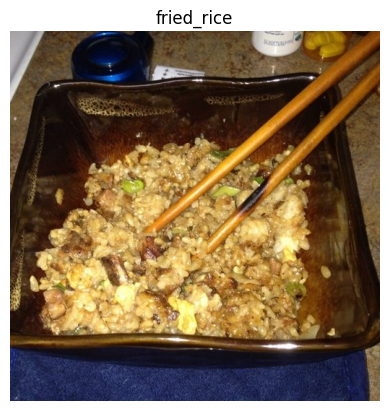

In [5]:
!pip install pillow
from PIL import Image
import matplotlib.pyplot as plt
import random

# Define the view_random_image function
def view_random_image(target_dir, target_class):
    # Get a random image path from the target class folder
    target_folder = os.path.join(target_dir, target_class)
    random_image = random.choice(os.listdir(target_folder))
    image_path = os.path.join(target_folder, random_image)

    # Open and display the image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    return img

# View a random image from the training dataset
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
mtrain_Datagen=ImageDataGenerator(rescale=1/255.)
mtest_Datagen=ImageDataGenerator(rescale=1/255.)

In [8]:
train_data=mtrain_Datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical'
                                              )
test_data=mtrain_Datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical'
                                             )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#Creating The model
* 1 We need to use softmax in the final layer as activation function,
* 2 We need to use categorical crossentropy

In [13]:
import tensorflow as tf

model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,padding='valid',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [15]:
history = model.fit(train_data, # now 10 different classes
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 34s 127ms/step - loss: 2.1924 - accuracy: 0.1917 - val_loss: 2.0314 - val_accuracy: 0.2788
Epoch 2/10
235/235 [==============================] - 29s 124ms/step - loss: 1.9076 - accuracy: 0.3307 - val_loss: 1.8805 - val_accuracy: 0.3548
Epoch 3/10
235/235 [==============================] - 28s 119ms/step - loss: 1.4422 - accuracy: 0.5127 - val_loss: 2.0383 - val_accuracy: 0.3224
Epoch 4/10
235/235 [==============================] - 29s 124ms/step - loss: 0.8525 - accuracy: 0.7195 - val_loss: 2.8327 - val_accuracy: 0.2744
Epoch 5/10
235/235 [==============================] - 32s 137ms/step - loss: 0.3252 - accuracy: 0.8984 - val_loss: 4.0007 - val_accuracy: 0.2664
Epoch 6/10
235/235 [==============================] - 30s 127ms/step - loss: 0.1082 - accuracy: 0.9671 - val_loss: 5.4380 - val_accuracy: 0.2676
Epoch 7/10
235/235 [==============================] - 32s 135ms/step - loss: 0.0560 - accuracy: 0.9824 - val_loss: 6.5815 - val_ac

In [19]:
model.evaluate(test_data)

79/79 [==============================] - 7s 87ms/step - loss: 7.4532 - accuracy: 0.2656


[7.453184604644775, 0.2655999958515167]

In [16]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

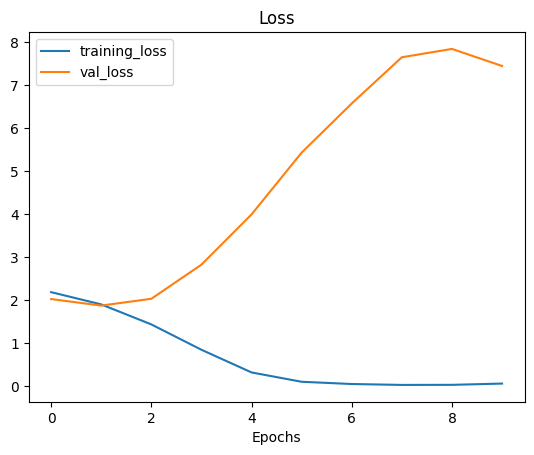

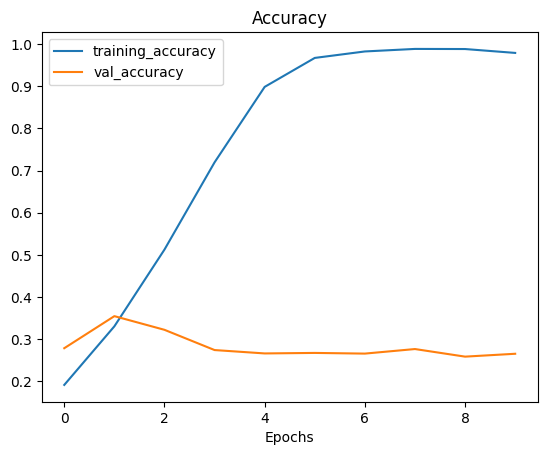

In [17]:
plot_loss_curves(history)

# Improving the model
* 1 Using data augmentation\
* 2 If the mode is too complicated make it simple
* 3 Use transfer learning

In [20]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')


Found 7500 images belonging to 10 classes.


In [22]:
model2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,padding='valid',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [24]:
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy']
               )

In [25]:
history2 = model2.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 113s 474ms/step - loss: 2.2057 - accuracy: 0.1933 - val_loss: 2.0832 - val_accuracy: 0.2392
Epoch 2/5
235/235 [==============================] - 114s 484ms/step - loss: 2.0819 - accuracy: 0.2539 - val_loss: 2.0108 - val_accuracy: 0.2908
Epoch 3/5
235/235 [==============================] - 110s 469ms/step - loss: 2.0277 - accuracy: 0.2811 - val_loss: 2.0555 - val_accuracy: 0.3056
Epoch 4/5
235/235 [==============================] - 110s 469ms/step - loss: 1.9822 - accuracy: 0.2992 - val_loss: 1.8460 - val_accuracy: 0.3584
Epoch 5/5
235/235 [==============================] - 103s 440ms/step - loss: 1.9372 - accuracy: 0.3292 - val_loss: 1.7879 - val_accuracy: 0.3932


In [27]:
model2.evaluate(test_data)

79/79 [==============================] - 7s 90ms/step - loss: 1.7879 - accuracy: 0.3932


[1.78789222240448, 0.39320001006126404]

# Model has improved slightly To improve the model properly we have to use tranfer learning


#Savig the model

In [28]:
model2.save("saved_trained_model")

In [29]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 8s 95ms/step - loss: 1.7879 - accuracy: 0.3932


[1.7878919839859009, 0.39320001006126404]